In [383]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# df1 = pd.read_excel('online_retail_II.xlsx')
# df1.to_csv('original_data_09_10.csv', index=False)


# df2 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2010-2011')
# df2.to_csv('original_data_10_11.csv', index=False)


In [352]:
df_09_10 = pd.read_csv('original_data_09_10.csv')
df_10_11 = pd.read_csv('original_data_10_11.csv')

In [353]:
df = pd.concat([df_09_10, df_10_11], ignore_index=True)


In [354]:
# df.to_csv("concated_data.csv")


In [355]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [357]:
df.describe().round(1)

,Quantity,Price,Customer ID
count,1067371.0,1067371.0,824364.0
mean,9.9,4.6,15324.6
std,172.7,123.6,1697.5
min,-80995.0,-53594.4,12346.0
25%,1.0,1.2,13975.0
50%,3.0,2.1,15255.0
75%,10.0,4.2,16797.0
max,80995.0,38970.0,18287.0


In [358]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [359]:
df = df.dropna(subset=['Customer ID'])

In [380]:
doublons = df[df.duplicated(subset=['InvoiceDate', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country'], keep=False)]
doublons_trie = doublons.sort_values(by=['Description'])
doublons_trie.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalSale,Year,Month
904442,569670,23345,DOLLY GIRL BEAKER,1,2011-10-05 13:47:00,1.25,14730.0,United Kingdom,1.25,2011,10
904310,569669,23345,DOLLY GIRL BEAKER,1,2011-10-05 13:47:00,1.25,14730.0,United Kingdom,1.25,2011,10
661705,547944,21448,12 DAISY PEGS IN WOOD BOX,12,2011-03-28 14:59:00,1.65,12971.0,United Kingdom,19.80,2011,3
661700,547946,21448,12 DAISY PEGS IN WOOD BOX,12,2011-03-28 14:59:00,1.65,12971.0,United Kingdom,19.80,2011,3
976905,575208,20975,12 PENCILS SMALL TUBE RED RETROSPOT,24,2011-11-09 10:27:00,0.65,18172.0,United Kingdom,15.60,2011,11
976901,575207,20975,12 PENCILS SMALL TUBE RED RETROSPOT,24,2011-11-09 10:27:00,0.65,18172.0,United Kingdom,15.60,2011,11
1013143,577774,22567,20 DOLLY PEGS RETROSPOT,3,2011-11-21 15:57:00,1.45,16712.0,United Kingdom,4.35,2011,11
1013071,577773,22567,20 DOLLY PEGS RETROSPOT,3,2011-11-21 15:57:00,1.45,16712.0,United Kingdom,4.35,2011,11
904242,569669,22952,60 CAKE CASES VINTAGE CHRISTMAS,1,2011-10-05 13:47:00,0.55,14730.0,United Kingdom,0.55,2011,10
904375,569670,22952,60 CAKE CASES VINTAGE CHRISTMAS,1,2011-10-05 13:47:00,0.55,14730.0,United Kingdom,0.55,2011,10


In [361]:
df.drop_duplicates(keep='last', inplace=True)

In [362]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797885 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      797885 non-null  object 
 1   StockCode    797885 non-null  object 
 2   Description  797885 non-null  object 
 3   Quantity     797885 non-null  int64  
 4   InvoiceDate  797885 non-null  object 
 5   Price        797885 non-null  float64
 6   Customer ID  797885 non-null  float64
 7   Country      797885 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 54.8+ MB


In [363]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

## Quantités negatives

In [364]:
qtt_negative = df[df['Quantity'] < 0]
qtt_negative

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [365]:
transaction_par_description = qtt_negative.groupby('Description').size()
transaction_par_description.sort_values(ascending=False).head(10)


Description
Manual                                397
REGENCY CAKESTAND 3 TIER              341
BAKING SET 9 PIECE RETROSPOT          208
STRAWBERRY CERAMIC TRINKET BOX        181
POSTAGE                               180
Discount                              165
WHITE HANGING HEART T-LIGHT HOLDER    133
WHITE CHERRY LIGHTS                   119
RED RETROSPOT CAKE STAND              106
PINK CHERRY LIGHTS                     86
dtype: int64

- "Manual" "Discount" "POSTAGE" :  remboursements annulations, frais de port/ ajustements des commandes ?
- le reste produit de mauvaise qualité?


### Valeurs abérantes

<Axes: >

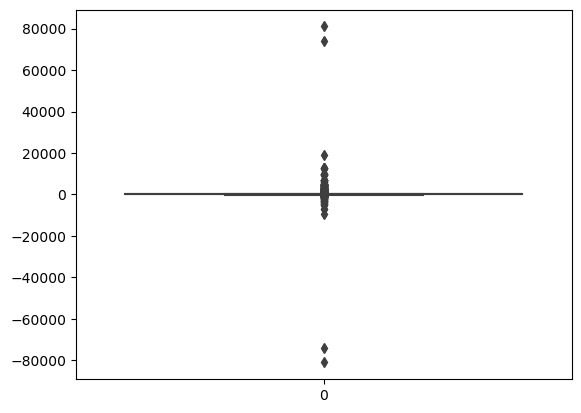

In [366]:
x=df['Quantity']
sns.boxplot(x)

In [367]:
df_qtt_neg = df.sort_values(by='Quantity')

df_qtt_neg.head(10)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1065883,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom
587085,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
529729,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom
359669,C524235,21088,SET/6 FRUIT SALAD PAPER CUPS,-7128,2010-09-28 11:02:00,0.08,14277.0,France
359670,C524235,21096,SET/6 FRUIT SALAD PAPER PLATES,-7008,2010-09-28 11:02:00,0.13,14277.0,France
359630,C524235,16047,POP ART PEN CASE & PENS,-5184,2010-09-28 11:02:00,0.08,14277.0,France
359636,C524235,37340,MULTICOLOUR SPRING FLOWER MUG,-4992,2010-09-28 11:02:00,0.10,14277.0,France
359653,C524235,85110,BLACK SILVER FLOWER T-LIGHT HOLDER,-4752,2010-09-28 11:02:00,0.07,14277.0,France
359658,C524235,16046,TEATIME PEN CASE & PENS,-4608,2010-09-28 11:02:00,0.08,14277.0,France
359654,C524235,85160A,WHITE BIRD GARDEN DESIGN MUG,-4320,2010-09-28 11:02:00,0.13,14277.0,France


In [368]:
df_qtt = df.sort_values(by='Quantity', ascending=False)
df_qtt.head(10)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1065882,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom
587080,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
90857,497946,37410,BLACK AND WHITE PAISLEY FLOWER MUG,19152,2010-02-15 11:57:00,0.10,13902.0,Denmark
127168,501534,21091,SET/6 WOODLAND PAPER PLATES,12960,2010-03-17 13:09:00,0.10,13902.0,Denmark
127166,501534,21099,SET/6 STRAWBERRY PAPER CUPS,12960,2010-03-17 13:09:00,0.10,13902.0,Denmark
127169,501534,21085,SET/6 WOODLAND PAPER CUPS,12744,2010-03-17 13:09:00,0.10,13902.0,Denmark
1027583,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom
127167,501534,21092,SET/6 STRAWBERRY PAPER PLATES,12480,2010-03-17 13:09:00,0.10,13902.0,Denmark
135030,502269,21981,PACK OF 12 WOODLAND TISSUES,10000,2010-03-23 15:36:00,0.25,17940.0,United Kingdom
135029,502269,21980,PACK OF 12 RED SPOTTY TISSUES,10000,2010-03-23 15:36:00,0.25,17940.0,United Kingdom


### Suppression des valeurs abérantes

In [369]:
lignes_a_supprimer = [1065882, 587080, 1065883, 587085]
df = df.drop(lignes_a_supprimer)


In [370]:
df.sort_values(by='Quantity', ascending=False).head(20)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
90857,497946,37410,BLACK AND WHITE PAISLEY FLOWER MUG,19152,2010-02-15 11:57:00,0.10,13902.0,Denmark
127166,501534,21099,SET/6 STRAWBERRY PAPER CUPS,12960,2010-03-17 13:09:00,0.10,13902.0,Denmark
127168,501534,21091,SET/6 WOODLAND PAPER PLATES,12960,2010-03-17 13:09:00,0.10,13902.0,Denmark
127169,501534,21085,SET/6 WOODLAND PAPER CUPS,12744,2010-03-17 13:09:00,0.10,13902.0,Denmark
1027583,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom
127167,501534,21092,SET/6 STRAWBERRY PAPER PLATES,12480,2010-03-17 13:09:00,0.10,13902.0,Denmark
135027,502269,21984,PACK OF 12 PINK PAISLEY TISSUES,10000,2010-03-23 15:36:00,0.25,17940.0,United Kingdom
135030,502269,21981,PACK OF 12 WOODLAND TISSUES,10000,2010-03-23 15:36:00,0.25,17940.0,United Kingdom
135028,502269,21982,PACK OF 12 SUKI TISSUES,10000,2010-03-23 15:36:00,0.25,17940.0,United Kingdom
135029,502269,21980,PACK OF 12 RED SPOTTY TISSUES,10000,2010-03-23 15:36:00,0.25,17940.0,United Kingdom


In [371]:
df.sort_values(by='Quantity', ascending=True).head(20)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
529729,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom
359669,C524235,21088,SET/6 FRUIT SALAD PAPER CUPS,-7128,2010-09-28 11:02:00,0.08,14277.0,France
359670,C524235,21096,SET/6 FRUIT SALAD PAPER PLATES,-7008,2010-09-28 11:02:00,0.13,14277.0,France
359630,C524235,16047,POP ART PEN CASE & PENS,-5184,2010-09-28 11:02:00,0.08,14277.0,France
359636,C524235,37340,MULTICOLOUR SPRING FLOWER MUG,-4992,2010-09-28 11:02:00,0.10,14277.0,France
359653,C524235,85110,BLACK SILVER FLOWER T-LIGHT HOLDER,-4752,2010-09-28 11:02:00,0.07,14277.0,France
359658,C524235,16046,TEATIME PEN CASE & PENS,-4608,2010-09-28 11:02:00,0.08,14277.0,France
359654,C524235,85160A,WHITE BIRD GARDEN DESIGN MUG,-4320,2010-09-28 11:02:00,0.13,14277.0,France
359674,C524235,85184D,S/4 BLUE ROUND DECOUPAGE BOXES,-3936,2010-09-28 11:02:00,0.42,14277.0,France
359660,C524235,16162L,THE KING GIFT BAG,-3744,2010-09-28 11:02:00,0.05,14277.0,France


## Creation de colonne Total des ventes 

In [372]:
df['TotalSale'] = df['Quantity'] * df['Price']

## Creation colonnes annee/mois

In [373]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

## Chiffre d'affaire annuel, mensuel, par pays

In [374]:
ventes_annuel = df.groupby('Year')['TotalSale'].sum()

ventes_mensuel = df.groupby(['Year', 'Month'])['TotalSale'].sum()

ventes_par_pays = df.groupby('Country')['TotalSale'].sum()


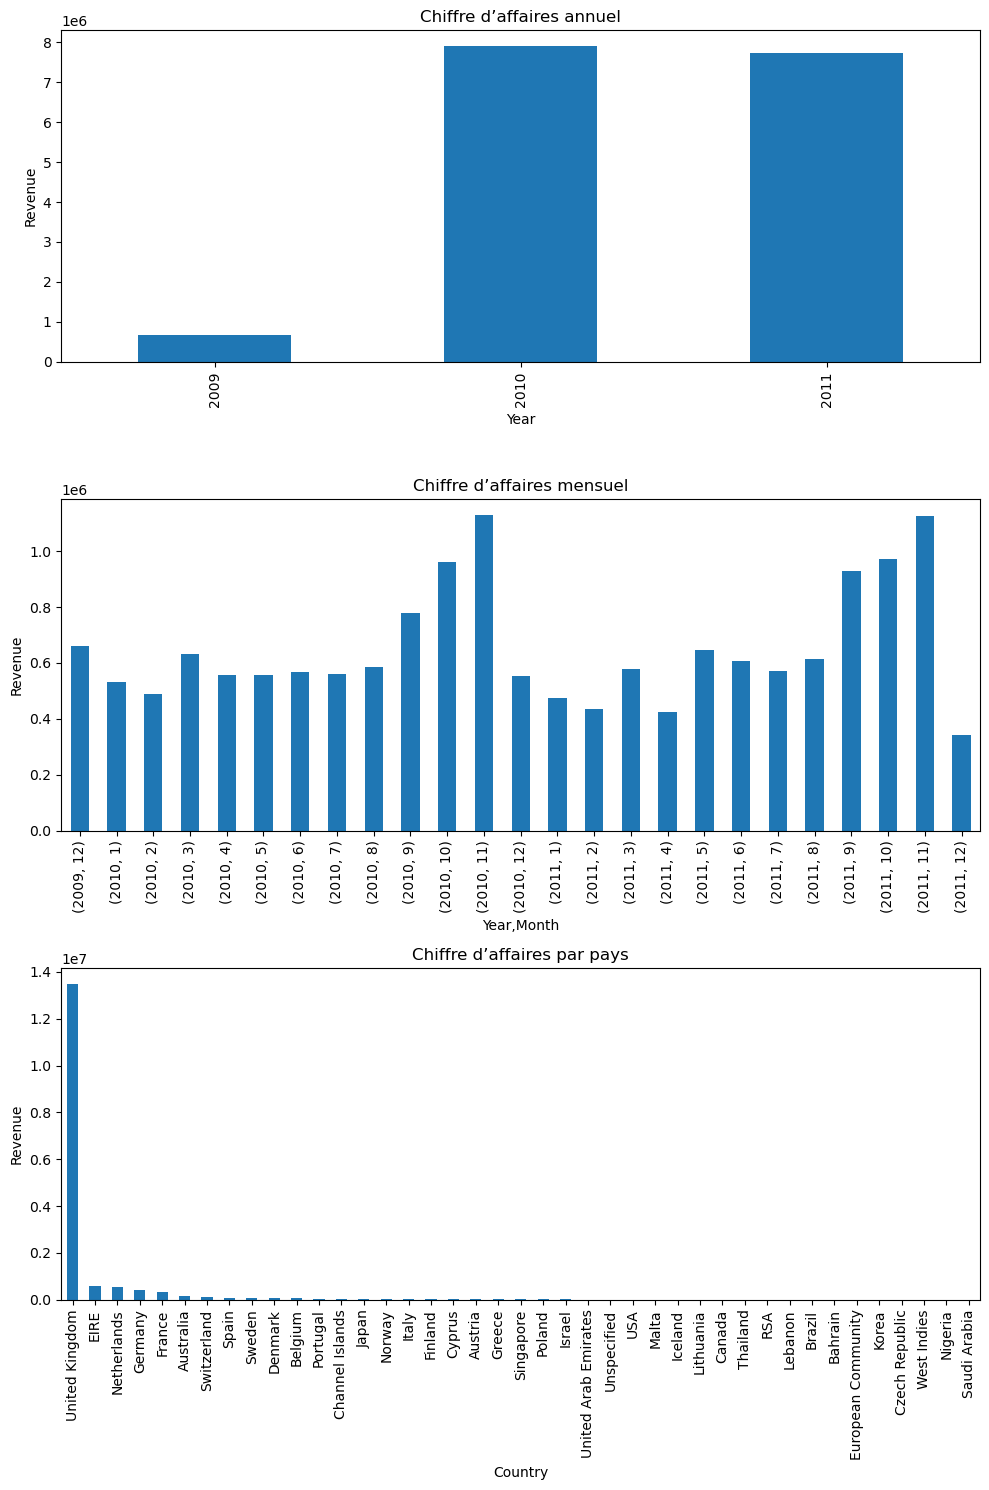

In [375]:
ventes_par_pays = ventes_par_pays.sort_values(ascending=False)
fig, axes = plt.subplots(3, 1, figsize=(10,15))

ventes_annuel.plot(kind='bar', ax=axes[0])
axes[0].set_title('Chiffre d’affaires annuel')
axes[0].set_ylabel('Revenue')

ventes_mensuel.plot(kind='bar', ax=axes[1])
axes[1].set_title('Chiffre d’affaires mensuel')
axes[1].set_ylabel('Revenue')

ventes_par_pays.plot(kind='bar', ax=axes[2])
axes[2].set_title('Chiffre d’affaires par pays')
axes[2].set_ylabel('Revenue')

plt.tight_layout()
plt.show()


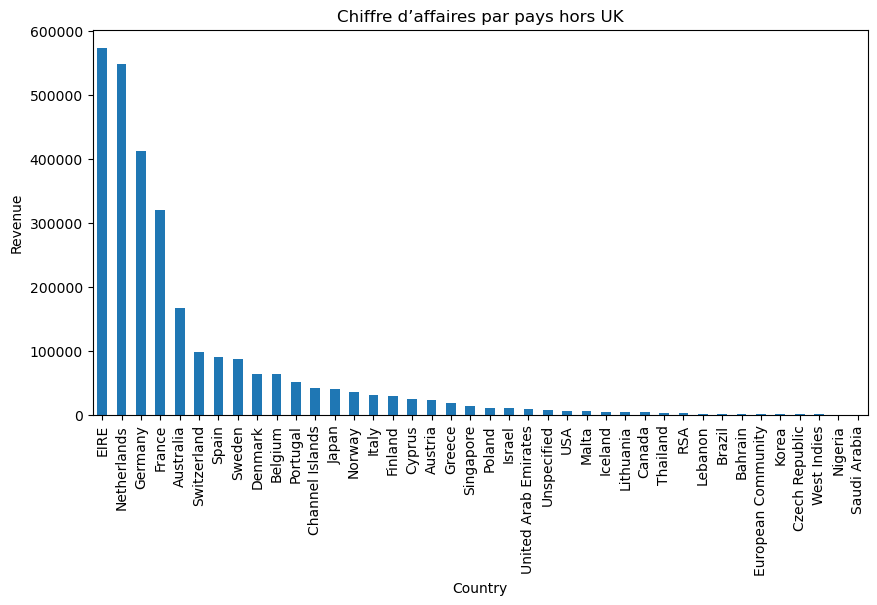

In [376]:
autres_pays = ventes_par_pays[ventes_par_pays.index != 'United Kingdom']
autres_pays = autres_pays.sort_values(ascending=False)

plt.figure(figsize=(10, 5))
autres_pays.plot(kind='bar')
plt.title('Chiffre d’affaires par pays hors UK')
plt.ylabel('Revenue')
plt.show()

## Creation de variables rfm

In [387]:
import pandas as pd
from datetime import datetime

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

snapshot_date = max(df['InvoiceDate']) + pd.DateOffset(days=1)

rfm = df.groupby(['Customer ID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  
    'Invoice': 'nunique',  
    'TotalSale': 'sum'  
})

rfm.rename(columns={
    'InvoiceDate': 'Récence',
    'Invoice': 'Fréquence',
    'TotalSale': 'Montant'
}, inplace=True)

rfm


,Récence,Fréquence,Montant
Customer ID,,,
12346.0,431,15,-51.74
12347.0,2,8,4921.53
12348.0,75,5,2019.40
12349.0,19,5,4404.54
12350.0,310,1,334.40
...,...,...,...
18283.0,4,22,2664.90
18284.0,430,2,436.68
18285.0,661,1,427.00


In [386]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalSale,Year,Month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,2009,12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2009,12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2009,12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,2009,12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,2009,12
...,...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011,12
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,2011,12
